In [31]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import seaborn as sns
import string # this is used for string manipulations
import matplotlib
import matplotlib.style
plt.style.use('seaborn')
import matplotlib.style
plt.style.use('seaborn')
%matplotlib inline
import wordcloud

In [32]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to C:\Users\Aditya
[nltk_data]     Rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [33]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [34]:
inaugural_speech

,president,text
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


# 2.1 Find the number of characters, words and sentences for the mentioned documents

### Number of characters

In [35]:
inaugural_speech['char_count'] = inaugural_speech['text'].str.len() ## this also includes spaces
inaugural_speech

,president,text,char_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


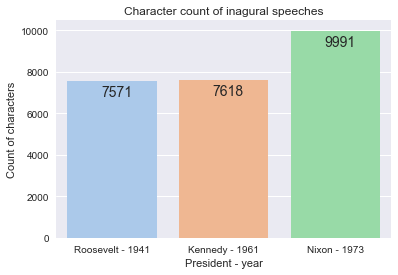

In [37]:
plt.figure(figsize=(6,4))
ax = sns.barplot(y='char_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Character count of inagural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of characters')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-750), fontsize = 14)

### Number of words

In [38]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

,president,text,char_count,word_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769


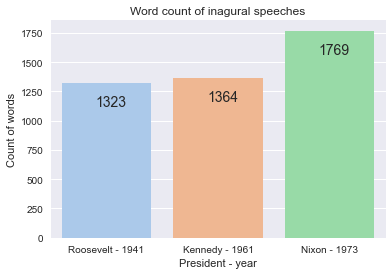

In [39]:
plt.figure(figsize=(6,4))
ax = sns.barplot(y='word_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Word count of inagural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-200), fontsize = 14)

### Number of sentences

In [40]:
from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

,president,text,char_count,word_count,sents_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323,68
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364,52
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769,68


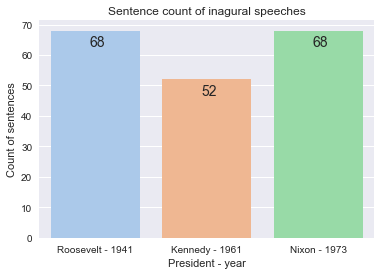

In [41]:
plt.figure(figsize=(6,4))
ax = sns.barplot(y='sents_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Sentence count of inagural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of sentences')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.35,
                     p.get_height()-5), fontsize = 14)

# 2.2 Remove all the stopwords from the three speeches

### Roosevelt

In [45]:
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)

['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democ

In [54]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.corpus import stopwords
stop_test = stopwords.words('english') +list(string.punctuation)

In [48]:
# printing all the stopwords
print(stop_test)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
stop_test.sort()

### Adding '--' to the stopword dictionary

In [53]:
stop_test.append('--')

In [57]:
Roosevelt_s = inaugural.raw('1941-Roosevelt.txt')
r = pd.DataFrame({'Text': Roosevelt_s}, index = [0])
r['word_count'] = r['Text'].apply(lambda x: len(str(x).split()))
r['count_stop'] = r['Text'].apply(lambda x: len([x for x in x.split() if x in stop_test]))
r['stop'] = r['Text'].apply(lambda x: ([x for x in x.split() if x in stop_test ]))
print(r['stop'][0])

['each', 'of', 'the', 'have', 'their', 'of', 'to', 'the', 'the', 'of', 'the', 'was', 'to', 'and', 'a', 'the', 'of', 'the', 'was', 'to', 'that', 'from', 'from', 'this', 'the', 'of', 'the', 'is', 'to', 'that', 'and', 'its', 'from', 'from', 'there', 'has', 'a', 'in', 'the', 'of', 'to', 'for', 'a', 'and', '--', 'to', 'what', 'our', 'in', 'has', 'and', 'to', 'what', 'we', 'are', 'and', 'what', 'we', 'we', 'do', 'we', 'the', 'of', 'of', 'are', 'not', 'by', 'the', 'of', 'but', 'by', 'the', 'of', 'the', 'of', 'a', 'is', 'and', 'a', 'a', 'of', 'a', 'is', 'the', 'of', 'the', 'of', 'its', 'will', 'to', 'are', 'who', 'are', 'who', 'that', 'as', 'a', 'of', 'and', 'a', 'of', 'is', 'or', 'by', 'a', 'of', 'and', 'for', 'some', 'and', 'have', 'the', 'of', 'the', '--', 'and', 'that', 'is', 'an', 'we', 'that', 'this', 'is', 'not', 'when', 'the', 'of', 'this', 'by', 'a', 'we', 'that', 'this', 'is', 'not', 'were', 'in', 'the', 'of', '--', 'but', 'we', 'have', 'been', '--', 'for', 'the', 'of', 'this', 'they

In [59]:
r['upper'] = r['Text'].apply(lambda x:  len([x for x in x.split() if x.isupper()]))
r

,Text,word_count,count_stop,stop,upper
0,On each national day of inauguration since 178...,1360,654,"[each, of, the, have, their, of, to, the, the,...",3


### Kennedy

In [61]:
list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)

['Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gene

In [65]:
Kennedy_s = inaugural.raw('1961-Kennedy.txt')
k = pd.DataFrame({'Text': Kennedy_s}, index = [0])
k['word_count'] = k['Text'].apply(lambda x: len(str(x).split()))
k['count_stop'] = k['Text'].apply(lambda x: len([x for x in x.split() if x in stop_test]))
stop_test.append('us')
stop_test.append('let')
k['stop'] = k['Text'].apply(lambda x: ([x for x in x.split() if x in stop_test]))
print(k['stop'][0])

['we', 'not', 'a', 'of', 'but', 'a', 'of', '--', 'an', 'as', 'as', 'a', '--', 'as', 'as', 'have', 'before', 'you', 'and', 'the', 'same', 'our', 'a', 'and', 'is', 'very', 'in', 'his', 'the', 'to', 'all', 'of', 'and', 'all', 'of', 'the', 'same', 'for', 'which', 'our', 'are', 'at', 'the', '--', 'the', 'that', 'the', 'of', 'not', 'from', 'the', 'of', 'the', 'but', 'from', 'the', 'of', 'not', 'that', 'we', 'are', 'the', 'of', 'that', 'the', 'from', 'this', 'and', 'to', 'and', 'that', 'the', 'has', 'been', 'to', 'a', 'of', '--', 'in', 'this', 'by', 'by', 'a', 'and', 'of', 'our', '--', 'and', 'to', 'or', 'the', 'of', 'those', 'to', 'which', 'this', 'has', 'been', 'and', 'to', 'which', 'we', 'are', 'at', 'and', 'the', 'it', 'us', 'or', 'that', 'we', 'any', 'any', 'any', 'any', 'any', 'in', 'to', 'the', 'and', 'the', 'of', 'we', '--', 'and', 'those', 'and', 'we', 'we', 'the', 'of', 'there', 'is', 'we', 'do', 'in', 'a', 'of', 'there', 'is', 'we', 'can', 'do', '--', 'for', 'we', 'not', 'a', 'at',

In [66]:
k['upper'] = k['Text'].apply(lambda x:  len([x for x in x.split() if x.isupper()]))
k

,Text,word_count,count_stop,stop,upper
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390,661,"[we, not, a, of, but, a, of, --, an, as, as, a...",5


### Nixon

In [67]:
list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)

['Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditiona

In [68]:
Nixon_s = inaugural.raw('1973-Nixon.txt')
n = pd.DataFrame({'Text': Nixon_s}, index = [0])
n['word_count'] = n['Text'].apply(lambda x: len(str(x).split()))
n['count_stop'] = n['Text'].apply(lambda x: len([x for x in x.split() if x in stop_test]))
n['stop'] = n['Text'].apply(lambda x: ([x for x in x.split() if x in stop_test]))
print(n['stop'][0])

['and', 'my', 'of', 'this', 'and', 'we', 'we', 'here', 'was', 'in', 'by', 'the', 'of', 'and', 'of', 'at', 'we', 'here', 'we', 'on', 'the', 'of', 'a', 'of', 'in', 'the', 'before', 'us', 'we', 'that', 'us', 'that', 'this', 'we', 'are', 'about', 'to', 'will', 'not', 'be', 'what', 'other', 'have', 'so', 'a', 'of', 'and', 'that', 'to', 'at', 'and', 'us', 'that', 'this', 'will', 'be', 'what', 'it', 'can', 'a', 'of', 'in', 'which', 'we', 'the', 'and', 'the', 'of', 'as', 'we', 'our', 'as', 'a', 'from', 'our', 'for', 'to', 'our', 'and', 'by', 'our', 'to', 'and', 'to', 'we', 'were', 'to', 'the', 'for', 'a', 'and', 'more', 'of', 'the', 'of', 'the', 'of', 'will', 'be', 'as', 'the', 'of', 'the', 'the', 'of', 'a', 'in', 'the', 'we', 'in', 'the', 'is', 'not', 'the', 'which', 'is', 'an', 'between', 'but', 'a', 'which', 'can', 'for', 'to', 'is', 'that', 'we', 'both', 'the', 'and', 'the', 'of', 'in', 'that', 'we', 'in', 'to', 'the', 'there', 'will', 'be', 'no', 'we', 'in', 'to', 'there', 'will', 'be', '

In [70]:
n['upper'] = n['Text'].apply(lambda x:  len([x for x in x.split() if x.isupper()]))
n

,Text,word_count,count_stop,stop,upper
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819,950,"[and, my, of, this, and, we, we, here, was, in...",14


### 2.2 Remove all the stopwords from the three speeches

In [71]:
# Lower case conversion
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [72]:
# Remove punctuation
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [73]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall']
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

In [74]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech

,president,text,char_count,word_count,sents_count
1941-Roosevelt,Roosevelt - 1941,national day inauguration since 1789 people re...,7571,1323,68
1961-Kennedy,Kennedy - 1961,vice president johnson speaker chief justice p...,7618,1364,52
1973-Nixon,Nixon - 1973,vice president speaker chief justice senator c...,9991,1769,68


### Speeches after the removal of stopwords

In [84]:
r1=list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)
r1

['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vi

In [85]:
k1=list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)
k1

['vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much p

In [86]:
n1=list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)
n1

['vice president speaker chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role maintaining peac

# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

### Roosevelt

In [78]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:5]
freq
#inaugural_speech.iloc[0:1,0] 
# 1941-Roosevelt

nation       11
know         10
democracy     9
spirit        9
life          8
dtype: int64

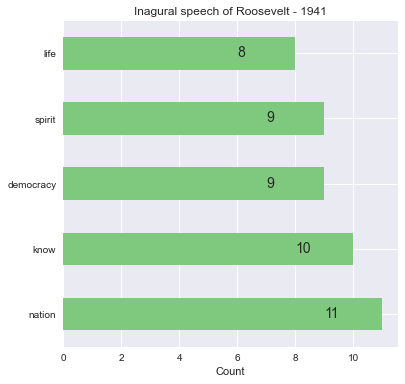

In [79]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Accent')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count')
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [97]:
from nltk.probability import FreqDist
fdist = FreqDist(r1[0].split())
print(fdist)

<FreqDist with 424 samples and 617 outcomes>


In [98]:
fdist.most_common(3)

[('nation', 11), ('know', 10), ('spirit', 9)]

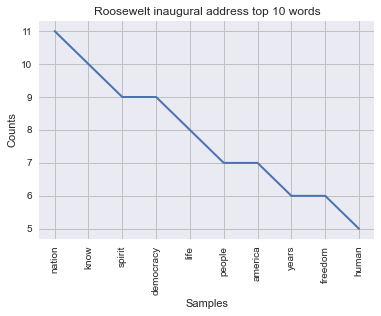

In [100]:
plt.title("Roosewelt inaugural address top 10 words")
fdist.plot(10 , cumulative=False)
plt.show()

### Kennedy

In [91]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:5]
freq
#inaugural_speech.iloc[1:2,0]
# 1961-Kennedy

world      8
sides      8
new        7
pledge     7
nations    5
dtype: int64

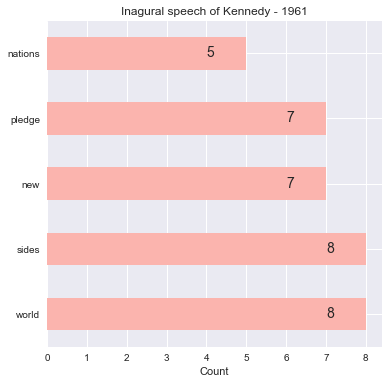

In [92]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Pastel1')
plt.title('Inagural speech of Kennedy - 1961')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-1, p.get_y()+.20), fontsize=14)

In [93]:
fdist2 = FreqDist(k1[0].split())
print(fdist2)

<FreqDist with 452 samples and 658 outcomes>


In [96]:
fdist2.most_common(3)

[('world', 8), ('sides', 8), ('new', 7)]

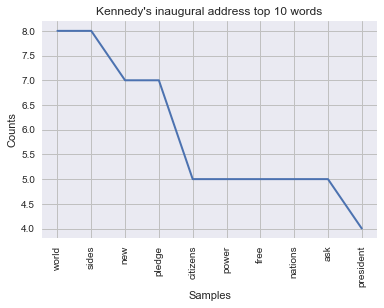

In [95]:
#frequency distribution plot
import matplotlib.pyplot as plt
plt.title("Kennedy's inaugural address top 10 words")
fdist2.plot(10 , cumulative=False)
plt.show()

### Nixon

In [101]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:5]
freq
#inaugural_speech.iloc[1:2,0]
# 1973-Nixon

peace             19
world             16
new               15
america           13
responsibility    11
dtype: int64

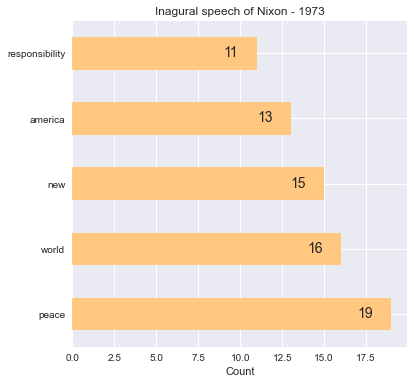

In [102]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'copper_r')
plt.title('Inagural speech of Nixon - 1973')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [103]:
fdist1 = FreqDist(n1[0].split())
print(fdist1)

<FreqDist with 416 samples and 775 outcomes>


In [104]:
fdist1.most_common(3)

[('peace', 19), ('world', 16), ('new', 15)]

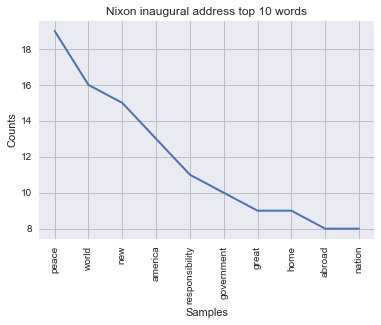

In [105]:
#frequency distribution plot
import matplotlib.pyplot as plt
plt.title("Nixon inaugural address top 10 words")
fdist1.plot(10 , cumulative=False)
plt.show()

# 2.4 Plot the word cloud of each of the three speeches. (after removing the stopwords)

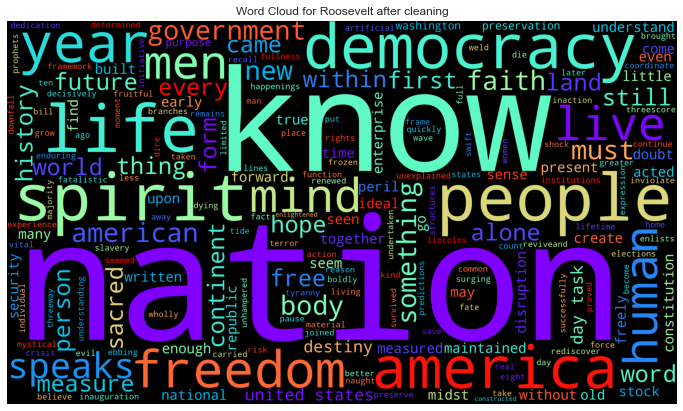

In [108]:
from wordcloud import WordCloud,STOPWORDS
#new_df=inaugural_speech.iloc[0:1,0]
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'rainbow',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud for Roosevelt after cleaning")
plt.show()

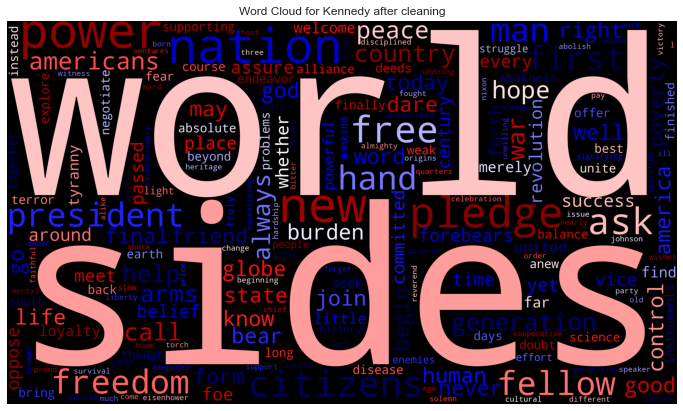

In [109]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'seismic_r',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud for Kennedy after cleaning")
plt.show()

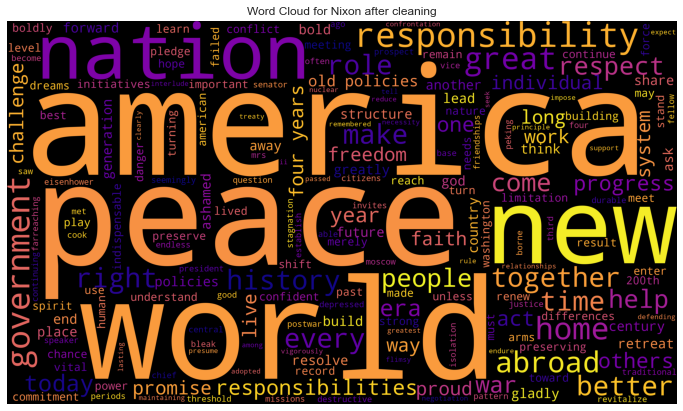

In [110]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'plasma',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud for Nixon after cleaning")
plt.show()